# Polynomial Interpolation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

## Newton’s Divided-Difference Formula
$$\mathrm{approximate}\, f(8.4)\quad \mathrm{if}\, f(8.1) =16.94410,\, f(8.3) =17.56492,\, f(8.6) =18.50515,\, f(8.7) =18.82091. $$

In [19]:
def newton_polynomial(x, initial_values, coefficients):
    
    poly = coefficients[0]
    for k in range(1, len(initial_values)):
        x_terms = 1
        for l in range(k):
            x_terms = x_terms * (x - initial_values[l])
        
        poly += coefficients[k] * x_terms
    
    return poly

x_inputs = [8.1, 8.3, 8.6, 8.7]
x_approx = 8.4

n = len(x_inputs)
F_array = np.zeros([n, n])

F_array[:, 0] = [16.94410, 17.56492, 18.50515, 18.82091]

for i in range(1, n):
    for j in range(1, i+1):
        F_array[i, j] = (F_array[i, j-1] - F_array[i-1, j-1]) / (x_inputs[i] - x_inputs[i-j])

print(F_array.round(5))
P_coeff = F_array.diagonal()
print('f({0})={1:.8f}'.format(x_approx, newton_polynomial(x_approx, x_inputs, P_coeff)))

[[ 1.694410e+01  0.000000e+00  0.000000e+00  0.000000e+00]
 [ 1.756492e+01  3.104100e+00  0.000000e+00  0.000000e+00]
 [ 1.850515e+01  3.134100e+00  6.000000e-02  0.000000e+00]
 [ 1.882091e+01  3.157600e+00  5.875000e-02 -2.080000e-03]]
f(8.4)=17.87714250


## Hermite Polynomials Using Divided Differences
$$
 x \quad f(x) \quad f'(x) \\
 0.1 \quad −0.62049958 \quad 3.58502082 \\
 0.2 \quad −0.28398668 \quad 3.14033271 \\
 0.3 \quad 0.00660095 \quad 2.66668043 \\
 0.4 \quad 0.24842440 \quad 2.16529366 \\
 f(\frac{1}{3})
$$

In [20]:
def newton_polynomial(x, initial_values, coefficients):
    
    poly = coefficients[0]
    for k in range(1, len(initial_values)):
        x_terms = 1
        for l in range(k):
            x_terms = x_terms * (x - initial_values[l])
        
        poly += coefficients[k] * x_terms
    
    return poly

x_inputs = [0.1, 0.2, 0.3, 0.4]
f_values = [-0.62049958, -0.28398668, 0.00660095, 0.24842440]
f_prime_values = [3.58502082, 3.14033271, 2.66668043, 2.16529366]
x_approx = 1/3

n = len(x_inputs)
F_array = np.zeros([2*n, 2*n])

z_values = []
temp_values = []
for m in range(n):
    z_values.extend([x_inputs[m], x_inputs[m]])
    temp_values.extend([f_values[m], f_values[m]])

F_array[:, 0] = temp_values
for i in range(n):
    F_array[2*i+1, 1] = f_prime_values[i]
    if i != 0:
        F_array[2*i, 1] = (F_array[2*i, 0] - F_array[2*i-1, 0]) / (z_values[2*i] - z_values[2*i-1])

for i in range(2, 2*n):
    for j in range(2, i+1):
        F_array[i, j] = (F_array[i, j-1] - F_array[i-1, j-1]) / (z_values[i] - z_values[i-j])

print(F_array.round(5))
P_coeff = F_array.diagonal()
print('f({0})={1:.8f}'.format(x_approx, newton_polynomial(x_approx, z_values, P_coeff)))    # set z_values as a hermite polynomial

[[-6.20500e-01  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00]
 [-6.20500e-01  3.58502e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00]
 [-2.83990e-01  3.36513e+00 -2.19892e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00]
 [-2.83990e-01  3.14033e+00 -2.24796e+00 -4.90450e-01  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00]
 [ 6.60000e-03  2.90588e+00 -2.34456e+00 -4.83010e-01  3.72100e-02
   0.00000e+00  0.00000e+00  0.00000e+00]
 [ 6.60000e-03  2.66668e+00 -2.39196e+00 -4.73950e-01  4.53000e-02
   4.04700e-02  0.00000e+00  0.00000e+00]
 [ 2.48420e-01  2.41823e+00 -2.48446e+00 -4.62500e-01  5.72200e-02
   3.97200e-02 -2.53000e-03  0.00000e+00]
 [ 2.48420e-01  2.16529e+00 -2.52941e+00 -4.49490e-01  6.50600e-02
   3.92300e-02 -1.64000e-03  2.96000e-03]]
f(0.3333333333333333)=0.09276343


## A Piecewise Polynomial of Hermite Type

Runge function

$$
f(x)=\frac{1}{1+25x^2}, \quad x\in[-1,1].
$$

Runge found that if this function is interpolated at equidistant points $x_i$ between $−1$ and $1$ with a polynomial $P_{n}(x)$ of degree $\leq n$, the resulting interpolation oscillates toward the end of the interval, i.e. close to $−1$ and $1$. This shows that high-degree polynomial interpolation at equidistant points can be troublesome.(See in wikipedia "Runge's phenomenon")

Covert into 

$$
f(x)=\frac{1}{1+x^2}, \quad x\in[-5,5]
$$

and

$$
f^{'}(x)=\frac{-2x}{(1+x^2)^2}.
$$

Separate into ten parts equidistantly, approximate $-4,\,-3.5,\,-2,\,-1,\,0,\,1,\,2,\,3.5,\,4$.

In [6]:
def newton_polynomial(x, initial_values, coefficients):
    
    poly = coefficients[0]
    for k in range(1, len(initial_values)):
        x_terms = 1
        for l in range(k):
            x_terms = x_terms * (x - initial_values[l])
        
        poly += coefficients[k] * x_terms
    
    return poly


def hermite_interpolation(x, initial_values, fval, fpval):
    
    n = len(initial_values)
    F_array = np.zeros([2*n, 2*n])

    z_values = []
    temp_values = []
    for m in range(n):
        z_values.extend([initial_values[m], initial_values[m]])
        temp_values.extend([fval[m], fval[m]])

    F_array[:, 0] = temp_values
    for i in range(n):
        F_array[2*i+1, 1] = fpval[i]
        if i != 0:
            F_array[2*i, 1] = (F_array[2*i, 0] - F_array[2*i-1, 0]) / (z_values[2*i] - z_values[2*i-1])

    for i in range(2, 2*n):
        for j in range(2, i+1):
            F_array[i, j] = (F_array[i, j-1] - F_array[i-1, j-1]) / (z_values[i] - z_values[i-j])

    P_coeff = F_array.diagonal()
    
    return newton_polynomial(x, z_values, P_coeff), P_coeff


def runge(x):
    return 1 / (1 + x ** 2)


def runge_derivative(x):
    return -2 * x / (1 + x ** 2) ** 2

x_inputs = np.linspace(-5, 5, 10)
f_values = runge(x_inputs)
f_prime_values = runge_derivative(x_inputs)
x_approxs = np.array([-4, -3.5, -2, -1, 0, 1, 2, 3.5, 4])

for x_approx in x_approxs:
    y_actual = runge(x_approx)
    y_direct, _ = hermite_interpolation(x_approx, x_inputs, f_values, f_prime_values)

    input_interval = []
    for l in range(len(x_inputs)-1):
        input_interval.append(x_inputs[l:l+2])

    for sub_interval in input_interval:
        if sub_interval[0] < x_approx < sub_interval[1]:    # make sure x_approx is not split point
            sub_fval = runge(sub_interval)
            sub_fpval = runge(sub_interval)
            y_piecewise, _ = hermite_interpolation(x_approx, sub_interval, sub_fval, sub_fpval)
    
    print('approximate f(%.1f)' % x_approx)
    print('actual: %.8f' % y_actual)
    print('direct: %.8f' % y_direct)
    print('piecewise: %.8f' % y_piecewise)
    print('direct absolute/relative:', round(abs(y_direct - y_actual), 5), round(abs(y_direct - y_actual) / y_actual, 5))
    print('piecewise absolute/relative:', round(abs(y_piecewise - y_actual), 5), round(abs(y_piecewise - y_actual) / y_actual, 5))
    print('-'*10)

approximate f(-4.0)
actual: 0.05882353
direct: 0.02568213
piecewise: 0.05616445
direct absolute/relative: 0.03314 0.5634
piecewise absolute/relative: 0.00266 0.0452
----------
approximate f(-3.5)
actual: 0.07547170
direct: -0.00617934
piecewise: 0.07691230
direct absolute/relative: 0.08165 1.08188
piecewise absolute/relative: 0.00144 0.01909
----------
approximate f(-2.0)
actual: 0.20000000
direct: 0.19059916
piecewise: 0.19710715
direct absolute/relative: 0.0094 0.047
piecewise absolute/relative: 0.00289 0.01446
----------
approximate f(-1.0)
actual: 0.50000000
direct: 0.48800373
piecewise: 0.49431743
direct absolute/relative: 0.012 0.02399
piecewise absolute/relative: 0.00568 0.01137
----------
approximate f(0.0)
actual: 1.00000000
direct: 0.98082832
piecewise: 0.76415094
direct absolute/relative: 0.01917 0.01917
piecewise absolute/relative: 0.23585 0.23585
----------
approximate f(1.0)
actual: 0.50000000
direct: 0.48800373
piecewise: 0.68237514
direct absolute/relative: 0.012 0.0239

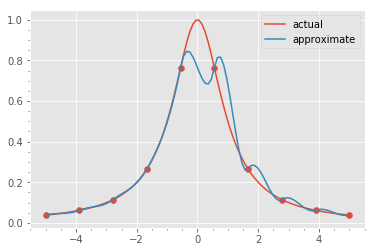

In [7]:
xs = np.linspace(-5, 5, 100)
y = runge(xs)

ys = []
for xss in xs:
    if xss != xs[-1]:
        for sub_interval in input_interval:
            if sub_interval[0] <= xss < sub_interval[1]:
                sub_fval = runge(sub_interval)
                sub_fpval = runge(sub_interval)
                yss, _ = hermite_interpolation(xss, sub_interval, sub_fval, sub_fpval)
                ys.append(yss)
    else:
        ys.append(runge(xss))

plt.scatter(x_inputs, f_values)
plt.plot(xs, y, label='actual')
plt.plot(xs, ys, label='approximate')
plt.legend()
plt.minorticks_on()
plt.show()

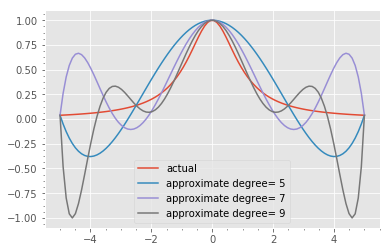

In [5]:
def lagrange_term(x, ini, k):
    temp_array = np.delete(ini, k, axis=0)
    return np.product(x - temp_array) / np.product(ini[k] - temp_array)


def lagrange_poly(x, ini, fval):
    poly = 0
    for k in range(len(ini)):
        poly += fval[k] * lagrange_term(x, ini, k)
    
    return poly


def runge(x):
    return 1 / (1 + x ** 2)

xs = np.linspace(-5, 5, 100)
y = runge(xs)

plt.plot(xs, y, label='actual')

for deg in range(5, 11, 2):
    x_inputs = np.linspace(-5, 5, deg)
    f_values = runge(x_inputs)
    ys = []
    for xss in xs:
        ys.append(lagrange_poly(xss, x_inputs, f_values))


    plt.plot(xs, ys, label='approximate degree= %d' % deg)

plt.legend()
plt.minorticks_on()
plt.show()

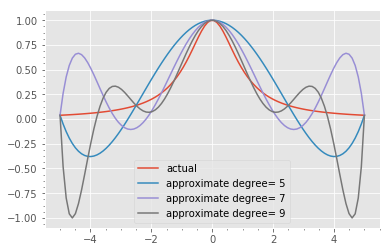

In [7]:
def newton_polynomial(x, initial_values, coefficients):
    
    poly = coefficients[0]
    for k in range(1, len(initial_values)):
        x_terms = 1
        for l in range(k):
            x_terms = x_terms * (x - initial_values[l])
        
        poly += coefficients[k] * x_terms
    
    return poly


def runge(x):
    return 1 / (1 + x ** 2)

xs = np.linspace(-5, 5, 100)
y = runge(xs)
plt.plot(xs, y, label='actual')

for deg in range(5, 11, 2):
    x_inputs = np.linspace(-5, 5, deg)
    f_values = runge(x_inputs)
    n = len(x_inputs)
    F_array = np.zeros([n, n])
    F_array[:, 0] = f_values
    for i in range(1, n):
        for j in range(1, i+1):
            F_array[i, j] = (F_array[i, j-1] - F_array[i-1, j-1]) / (x_inputs[i] - x_inputs[i-j])

    P_coeff = F_array.diagonal()
    ys = []
    for xss in xs:
        ys.append(newton_polynomial(xss, x_inputs, P_coeff))


    plt.plot(xs, ys, label='approximate degree= %d' % deg)

plt.legend()
plt.minorticks_on()
plt.show()

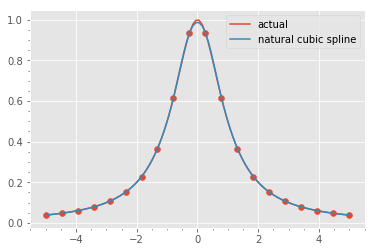

In [9]:
from scipy.interpolate import CubicSpline


def runge(x):
    return 1 / (1 + x ** 2)


def runge_derivative(x):
    return -2 * x / (1 + x ** 2) ** 2


# x_inputs = np.linspace(-5, 5, 10)
x_inputs = np.linspace(-5, 5, 20)
f_values = runge(x_inputs)
f_prime_values = runge_derivative(x_inputs)

cs_natural = CubicSpline(x_inputs, f_values, bc_type='natural')
# cs_clamped = CubicSpline(x_inputs, f_values, bc_type=((1, f_prime_values[0]), (1, f_prime_values[-1])))

xs = np.linspace(-5, 5, 100)

ys_natural = cs_natural(xs)
ys_clamped = cs_natural(xs)

plt.scatter(x_inputs, f_values)
plt.plot(xs, runge(xs), label='actual')
plt.plot(xs, ys_natural, label='natural cubic spline')
# plt.plot(xs, ys_clamped, label='clamped cubic spline')
plt.legend()
plt.minorticks_on()
plt.show()